# Importing Library

In [ ]:
#Import Os and Basis Libraries
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Matplot Images
import matplotlib.image as mpimg

# Tensflor and Keras Layer and Model and Optimize and Loss
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras import regularizers
from tensorflow.keras.losses import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model, to_categorical

#Kernel Intilizer
from tensorflow.keras.initializers import he_normal

# import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam , Adamax

#PreTrained Model
from tensorflow.keras.applications import *

#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

# Warnings Remove
import warnings
warnings.filterwarnings("ignore")

# F1 Score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Splitting Data
# import splitfolders
from keras.regularizers import l2

# Load Dataset


In [ ]:
!git clone https://github.com/mariskaiz/dataset_tugas_akhir

Cloning into 'dataset_tugas_akhir'...
remote: Enumerating objects: 4825, done.
remote: Total 4825 (delta 0), reused 0 (delta 0), pack-reused 4825
Receiving objects: 100% (4825/4825), 1.02 GiB | 21.08 MiB/s, done.
Updating files: 100% (4830/4830), done.


# Get Train data (4500 gambar)

In [ ]:
# Directory containing the "TRAIN" folder
directory_train = "/content/dataset_tugas_akhir/train"

filepath =[]
label = []

folds = os.listdir(directory_train)

for fold in folds:
    f_path = os.path.join(directory_train , fold)

    imgs = os.listdir(f_path)

    for img in imgs:

        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)

#Concat data paths with labels
file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_train = pd.concat([file_path_series ,Label_path_series ] , axis = 1)
df_train

,filepath,label
0,/content/dataset_tugas_akhir/train/tuberculosi...,tuberculosis
1,/content/dataset_tugas_akhir/train/tuberculosi...,tuberculosis
2,/content/dataset_tugas_akhir/train/tuberculosi...,tuberculosis
3,/content/dataset_tugas_akhir/train/tuberculosi...,tuberculosis
4,/content/dataset_tugas_akhir/train/tuberculosi...,tuberculosis
...,...,...
4495,/content/dataset_tugas_akhir/train/pneumonia/p...,pneumonia
4496,/content/dataset_tugas_akhir/train/pneumonia/p...,pneumonia
4497,/content/dataset_tugas_akhir/train/pneumonia/p...,pneumonia
4498,/content/dataset_tugas_akhir/train/pneumonia/p...,pneumonia


# Get Validation Data (300 gambar)

In [ ]:
# Directory containing the "VALIDATION" folder
directory_test = "/content/dataset_tugas_akhir/test"

filepath =[]
label = []

folds = os.listdir(directory_test)

for fold in folds:
    f_path = os.path.join(directory_test , fold)

    imgs = os.listdir(f_path)

    for img in imgs:

        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)

#Concat data paths with labels
file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_valid = pd.concat([file_path_series ,Label_path_series ] , axis = 1)
df_valid

,filepath,label
0,/content/dataset_tugas_akhir/test/tubercullosi...,tubercullosis
1,/content/dataset_tugas_akhir/test/tubercullosi...,tubercullosis
2,/content/dataset_tugas_akhir/test/tubercullosi...,tubercullosis
3,/content/dataset_tugas_akhir/test/tubercullosi...,tubercullosis
4,/content/dataset_tugas_akhir/test/tubercullosi...,tubercullosis
...,...,...
295,/content/dataset_tugas_akhir/test/pneumonia/pe...,pneumonia
296,/content/dataset_tugas_akhir/test/pneumonia/pe...,pneumonia
297,/content/dataset_tugas_akhir/test/pneumonia/pe...,pneumonia
298,/content/dataset_tugas_akhir/test/pneumonia/pe...,pneumonia


# Get Testing Data

In [ ]:
# Directory containing the "TESTING" folder
directory_val = "/content/dataset_tugas_akhir/val"

filepath =[]
label = []

folds = os.listdir(directory_val)

for fold in folds:
    f_path = os.path.join(directory_val , fold)

    imgs = os.listdir(f_path)

    for img in imgs:

        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)

#Concat data paths with labels
file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_test = pd.concat([file_path_series ,Label_path_series ] , axis = 1)
df_test

,filepath,label
0,/content/dataset_tugas_akhir/val/tubercullosis...,tubercullosis
1,/content/dataset_tugas_akhir/val/tubercullosis...,tubercullosis
2,/content/dataset_tugas_akhir/val/tubercullosis...,tubercullosis
3,/content/dataset_tugas_akhir/val/tubercullosis...,tubercullosis
4,/content/dataset_tugas_akhir/val/tubercullosis...,tubercullosis
5,/content/dataset_tugas_akhir/val/tubercullosis...,tubercullosis
6,/content/dataset_tugas_akhir/val/tubercullosis...,tubercullosis
7,/content/dataset_tugas_akhir/val/tubercullosis...,tubercullosis
8,/content/dataset_tugas_akhir/val/tubercullosis...,tubercullosis
9,/content/dataset_tugas_akhir/val/tubercullosis...,tubercullosis


In [ ]:
# Shape
print(f"The shape of The Train data is: {df_train.shape}")
print(f"The shape of The Validation data is: {df_valid.shape}")
print(f"The shape of The Test data is: {df_test.shape}")

The shape of The Train data is: (4500, 2)
The shape of The Validation data is: (300, 2)
The shape of The Test data is: (30, 2)


# Data Pipline
Menggunakan image data low_from_dataframe


In [ ]:
# Create ImageDataGenerator instances for  Train , validation and test sets (only rescale pixel values)
train_datagen = ImageDataGenerator(rescale=1./255,)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 32

# Flow images from dataframes and apply augmentation (if any)
print("Training Data")
train_ds = train_datagen.flow_from_dataframe(
    df_train,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

print("Validation Data")
validation_ds = validation_datagen.flow_from_dataframe(
    df_valid,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

print("Test Data")
test_ds = test_datagen.flow_from_dataframe(
    df_test,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False #penting untuk menjaga urutan asli testing data
)

Training Data
Found 4500 validated image filenames belonging to 3 classes.
Validation Data
Found 300 validated image filenames belonging to 3 classes.
Test Data
Found 30 validated image filenames belonging to 3 classes.


# Visualisasi Data

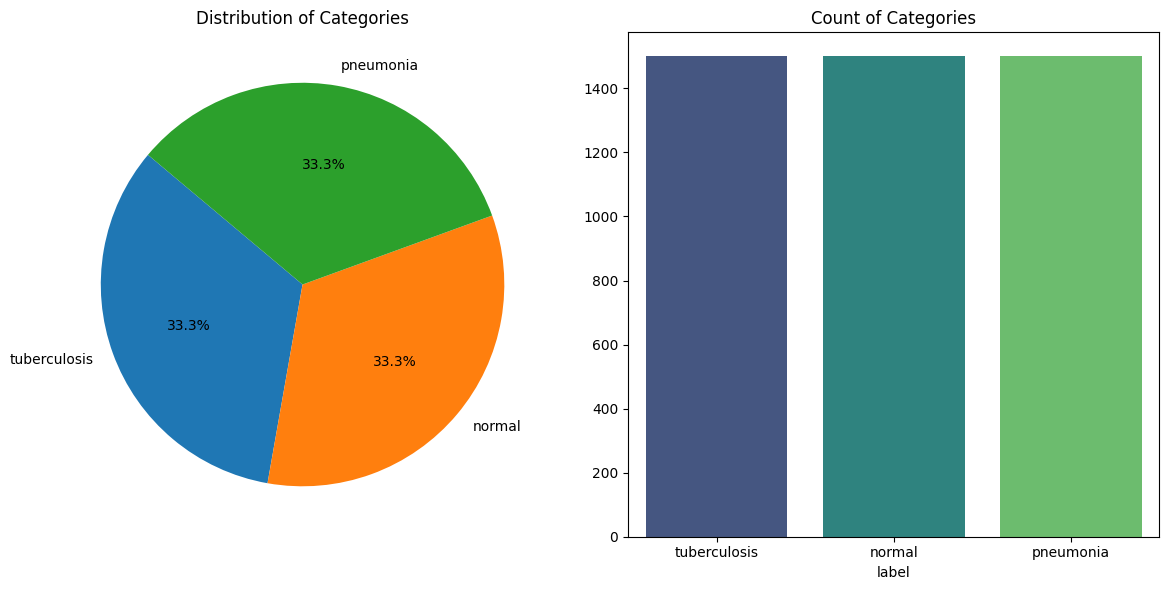

In [ ]:
# Count the occurrences of each category in the 'category' column
count = df_train['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

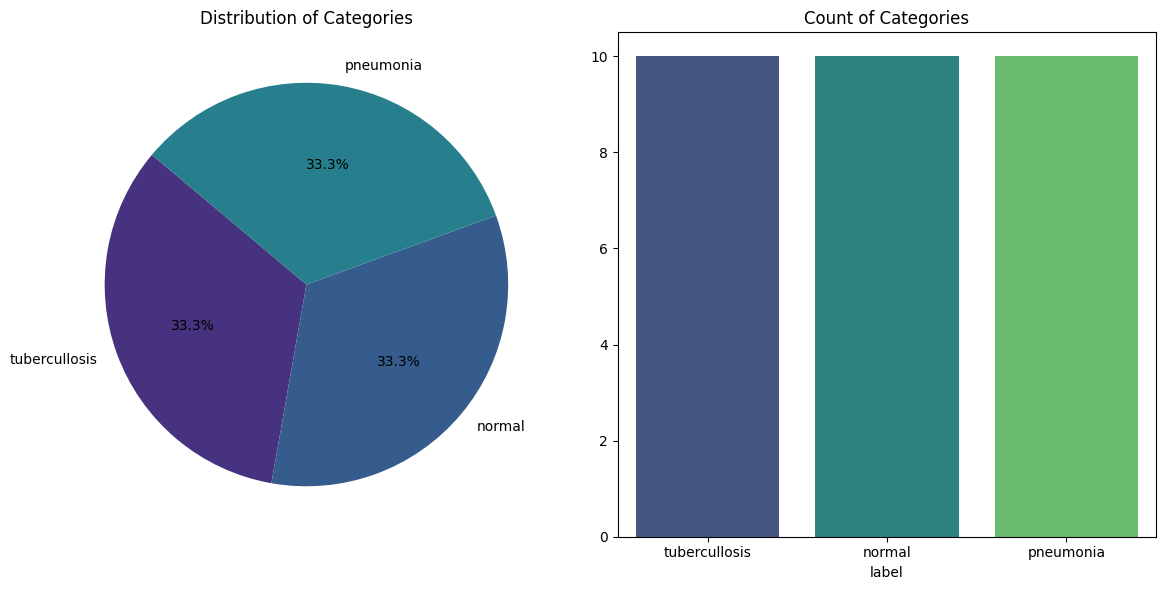

In [ ]:
# Count the occurrences of each category in the 'category' column
count = df_test['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

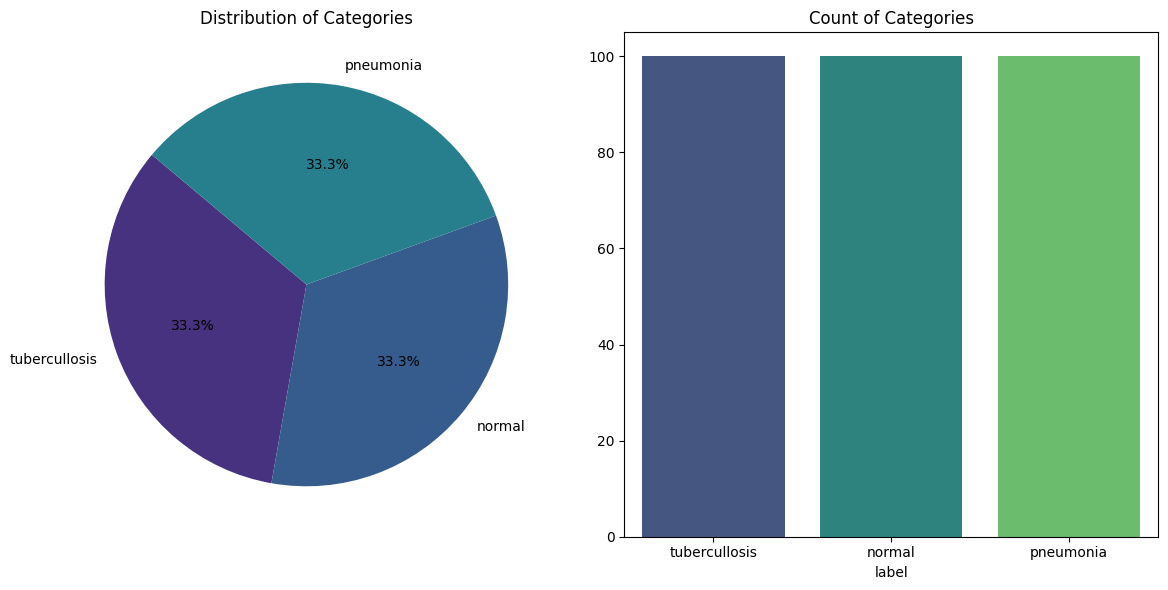

In [ ]:
# Count the occurrences of each category in the 'category' column
count = df_valid['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
def visualize_images(path, num_images=5):
    # Get a list of image filenames in the specified path
    image_filenames = os.listdir(path)

    # Limit the number of images to visualize if there are more than num_images
    num_images = min(num_images, len(image_filenames))

    # Create a figure and axis object to display images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3),facecolor='white')

    # Iterate over the selected images and display them
    for i, image_filename in enumerate(image_filenames[:num_images]):
        # Load the image using Matplotlib
        image_path = os.path.join(path, image_filename)
        image = mpimg.imread(image_path)

        # Display the image
        axes[i].imshow(image)
        axes[i].axis('off')  # Turn off axis
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()

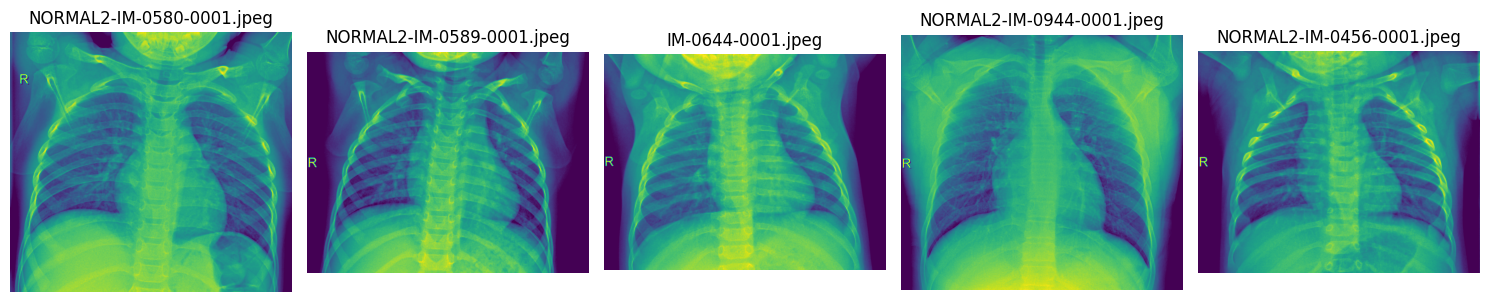

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/dataset_tugas_akhir/train/normal"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

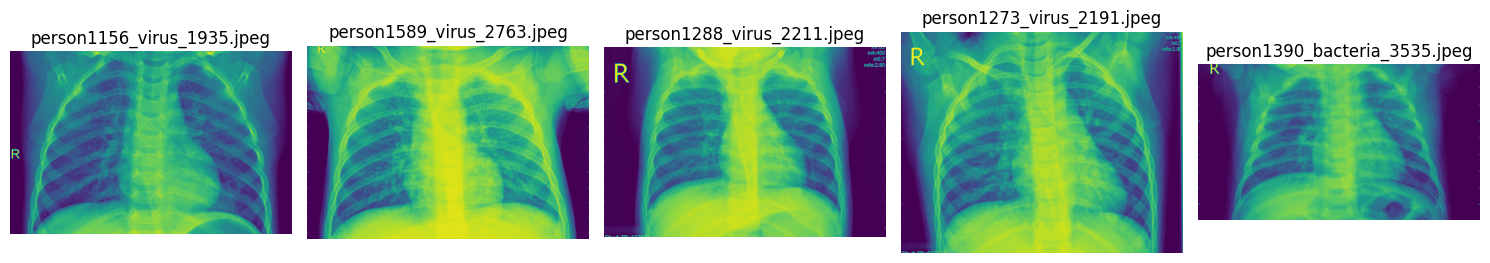

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/dataset_tugas_akhir/train/pneumonia"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

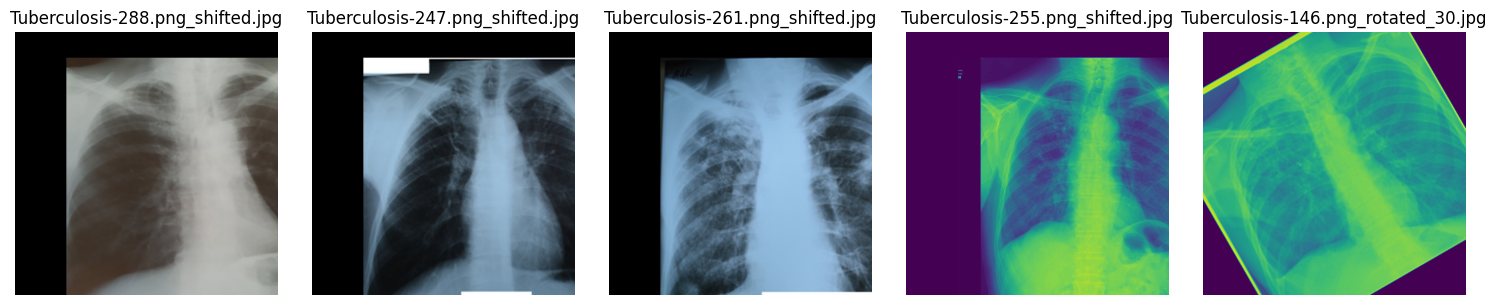

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/dataset_tugas_akhir/train/tuberculosis"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

# Model Build MobileNet V1

In [ ]:
# Load MobileNet V1 base model, excluding the top layers
base_model = MobileNet(weights='imagenet', include_top=False, pooling='max', input_shape=(224, 224, 3))
base_model.trainable = False

# Build the model
model = Sequential()
# Add the base model
model.add(base_model)
# Add Batch Normalization
model.add(BatchNormalization())
# Add Dense Layer 256
model.add(Dense(256, activation='relu'))
# Add Dense Layer 128
model.add(Dense(128, activation='relu'))
# Add another Batch Normalization layer
model.add(BatchNormalization())
# Add Dropout layer
model.add(Dropout(0.5))
# Add the Output layer
model.add(Dense(3, activation='softmax'))
# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 1024)              3228864   
 onal)                                                           
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                        

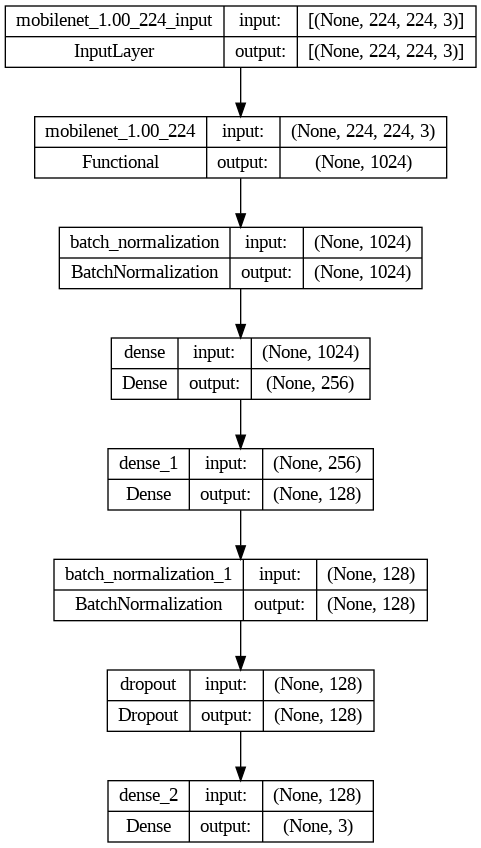

In [ ]:
# Plot model ke file gambar
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:


#Early_Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

#Fitting Model
history = model.fit(train_ds,
                        epochs= 15,
                        steps_per_epoch = len(train_ds),
                        validation_data = validation_ds,
                        validation_steps = len(validation_ds),
                        callbacks = early_stopping)

Epoch 1/15
141/141 [==============================] - 52s 315ms/step - loss: 0.2412 - accuracy: 0.9124 - val_loss: 1.2039 - val_accuracy: 0.7167
Epoch 2/15
141/141 [==============================] - 43s 304ms/step - loss: 0.1081 - accuracy: 0.9633 - val_loss: 0.4568 - val_accuracy: 0.8267
Epoch 3/15
141/141 [==============================] - 44s 313ms/step - loss: 0.0784 - accuracy: 0.9722 - val_loss: 0.3701 - val_accuracy: 0.8700
Epoch 4/15
141/141 [==============================] - 42s 295ms/step - loss: 0.0556 - accuracy: 0.9816 - val_loss: 0.4056 - val_accuracy: 0.8600
Epoch 5/15
141/141 [==============================] - 41s 290ms/step - loss: 0.0521 - accuracy: 0.9798 - val_loss: 0.4561 - val_accuracy: 0.8467
Epoch 6/15
141/141 [==============================] - 42s 300ms/step - loss: 0.0377 - accuracy: 0.9871 - val_loss: 0.4110 - val_accuracy: 0.8533
Epoch 7/15
141/141 [==============================] - 42s 294ms/step - loss: 0.0328 - accuracy: 0.9896 - val_loss: 0.4617 - val_ac

# Evaluating

1/1 [==============================] - 2s 2s/step


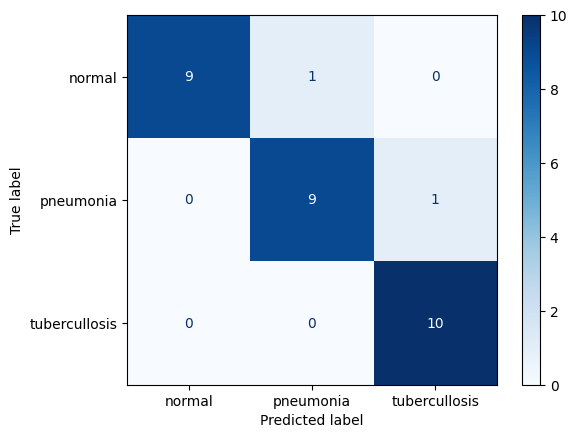

Classification Report
               precision    recall  f1-score   support

       normal       1.00      0.90      0.95        10
    pneumonia       0.90      0.90      0.90        10
tubercullosis       0.91      1.00      0.95        10

     accuracy                           0.93        30
    macro avg       0.94      0.93      0.93        30
 weighted avg       0.94      0.93      0.93        30



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Melakukan prediksi pada data test
y_true = test_ds.classes
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Menampilkan confusion matrix
labels = list(test_ds.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Menampilkan classification report
print("Classification Report")
print(classification_report(y_true, y_pred, target_names=labels))

In [ ]:
model.save('mobilenetV1_model.h5')